# 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.utils import *

Reading The Csv File

In [3]:
df = pd.read_csv('../data/raw_rating_data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [4]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


## Descriptive Statistics

#### Headline Length

In [4]:
# Creating a new column for the headline length
df['headline_length'] = df['headline'].apply(len)
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [5]:
# Obtain basic statistics
statistics = df['headline_length'].describe()

print(statistics)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Top 10 publishers

In [6]:
top_10_publishers = df['publisher'].value_counts().nlargest(10)
top_10_publishers

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

plot for top publishers

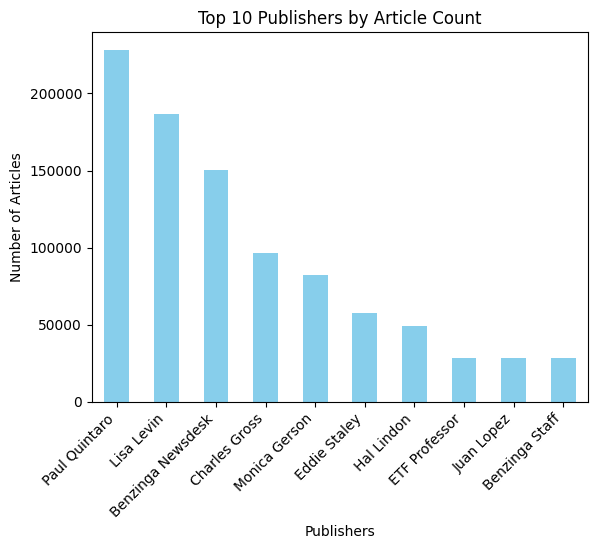

In [7]:
plot_top_publishers(df)

##### Analyze Publication Data

In [8]:
# Trends in publication dates and Analyze the publication dates

date_analysis = publication_dates(df)
print("\nTop 5 Days with Most Articles:")
print(date_analysis['top_days'])

print("\nArticle Distribution by Weekday:")
print(date_analysis['weekday_counts'])

print("\n Monthly Trends ")
print(date_analysis['monthly_counts'])

c:\Users\Leul\Nova-Financial-Solutions-Data-Analysis\scripts\utils.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.groupby(pd.Grouper(key='date', freq='M')).size()



Top 5 Days with Most Articles:
date
2020-03-12    2739
2020-02-28    1620
2020-03-19    1594
2020-02-27    1567
2020-03-06    1428
dtype: int64

Article Distribution by Weekday:
date
Thursday     302595
Wednesday    300940
Tuesday      296470
Monday       265164
Friday       217892
Sunday        16514
Saturday       7753
Name: count, dtype: int64

 Monthly Trends 
date
2009-02-28 00:00:00-04:00        1
2009-03-31 00:00:00-04:00        0
2009-04-30 00:00:00-04:00        3
2009-05-31 00:00:00-04:00       12
2009-06-30 00:00:00-04:00       40
                             ...  
2020-02-29 00:00:00-04:00    18879
2020-03-31 00:00:00-04:00    24994
2020-04-30 00:00:00-04:00    20757
2020-05-31 00:00:00-04:00    17992
2020-06-30 00:00:00-04:00     6447
Freq: ME, Length: 137, dtype: int64


Analyze the publication dates to see trends over time

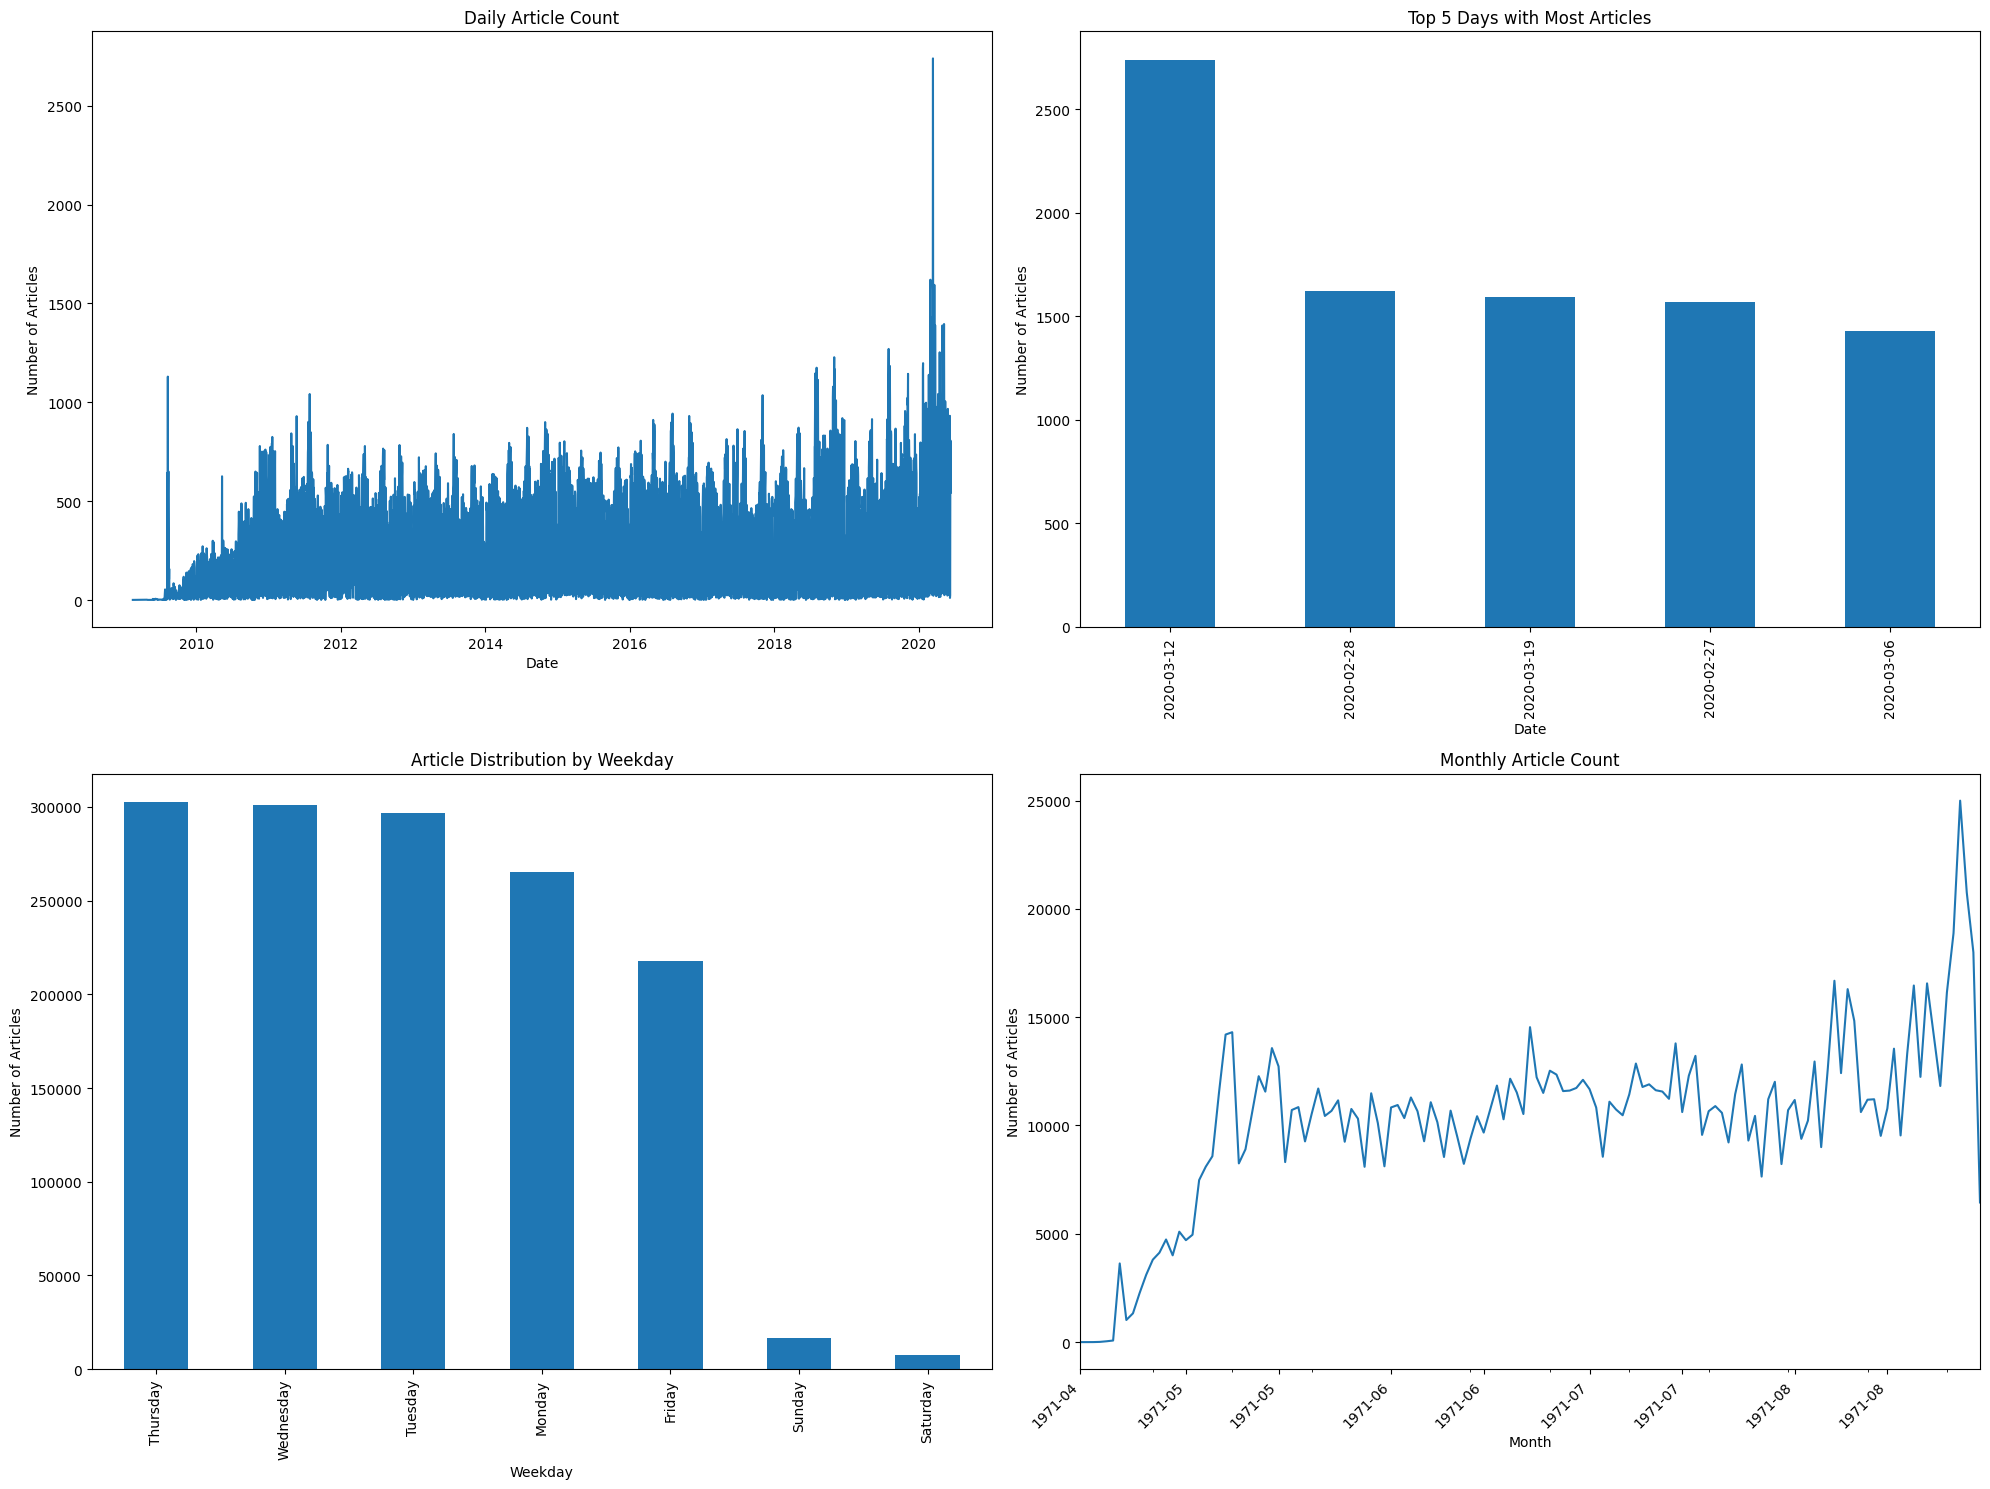

In [9]:
fig = plot_publication_trends(date_analysis)